In [3]:
%matplotlib inline

from IPython.display import Audio
from IPython.display import Image


import sklearn.preprocessing
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np 
import librosa as lr
import librosa.display
import matplotlib.pyplot as plt
import wave
import soundfile as sf
import math
import visualkeras

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [4]:
username = "user"
directory = "C:/Users/" + username + "/Downloads/IRMAS_Training_Data/IRMAS_Training_Data"
directory_names = os.listdir(directory)
instrument_of_interest = "org"
n_coef = 20
index = directory_names.index(instrument_of_interest)

In [5]:
directory_names = np.array(directory_names)
n=0
m = directory_names.size
num_files = np.zeros(m)
i=0
for instrument in directory_names:
    directory_path = os.path.join("C:/Users/" + username + "/Downloads/IRMAS_Training_Data/IRMAS_Training_Data", instrument)
    file_list = os.listdir(directory_path)
    num_files[i] = np.size(file_list)
    i = i + 1
    n = n + np.size(file_list) 
    
num_files = num_files.astype(int) 
print(num_files)

[388 505 451 637 760 682 721 626 577 580 778]


In [6]:
directory_path = os.path.join(directory, instrument_of_interest)
file_list = os.listdir(directory_path)

mfcc_tensor1=np.zeros((num_files[index],n_coef,130))
iter = 0

for file in file_list:
        
    file_path = os.path.join(directory_path, file)
    
    y, sr = librosa.load(file_path, sr=None)
    
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_coef, hop_length=1024)
    
    mfcc_tensor1[iter,:,:]=mfcc
    
    iter=iter+1


In [7]:
directory_path = os.path.join(directory, instrument_of_interest)
file_list = os.listdir(directory_path)

mfcc_tensor2=np.zeros((6705-num_files[index],n_coef,130))
iter = 0

for instrument in [x for x in directory_names if x != instrument_of_interest]:
    directory_path = os.path.join(directory, instrument)
    file_list = os.listdir(directory_path)
    
    for file in file_list:
            
        file_path = os.path.join(directory_path, file)
        
        y, sr = librosa.load(file_path, sr=None)
        
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_coef, hop_length=1024)

        mfcc_tensor2[iter,:,:]=mfcc
        
        iter=iter+1


In [8]:
print(mfcc_tensor1.shape)
print(mfcc_tensor2.shape)

(682, 20, 130)
(6023, 20, 130)


In [9]:
no_random_examples = 3000

Y1 = np.ones((num_files[index]))
Y2 = np.zeros(no_random_examples)
Y = np.append(Y1, Y2)

In [10]:
random_indices = np.random.choice(6705 - num_files[index], size = no_random_examples, replace = False)

mfcc_tensor2_temp = mfcc_tensor2[random_indices,:,:]

In [11]:
mfcc_first_part = np.append(mfcc_tensor1, mfcc_tensor2_temp, axis = 0)
del mfcc_tensor1
del mfcc_tensor2
del mfcc_tensor2_temp

In [12]:
directory_mix2 = "C:/Users/" + username + "/Downloads/IRMAS_Training_Data/MIX2_" + instrument_of_interest
wav_files = [f for f in os.listdir(directory_mix2) if f.endswith('.wav')]
mix2files = [os.path.join(directory_mix2, f) for f in wav_files]

m = len(mix2files)
mfcc_tensor1 = np.zeros((m,n_coef,130))
iter = 0
for file in mix2files:
    file_path = os.path.join(directory_mix2, file)
    
    y, sr = librosa.load(file_path, sr=None)
    
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_coef, hop_length=1024)

    mfcc_tensor1[iter,:,:]=mfcc
    iter=iter+1

In [13]:
Y3 = []
for file in mix2files:
    with open(os.path.splitext(file)[0] + '.txt', 'r', encoding='utf-8') as f:
        text = f.read()
    if instrument_of_interest in text:
        Y3.append(1)
    else:
        Y3.append(0)
Y3 = np.array(Y3)

In [14]:
unique, count = np.unique(Y3, return_counts = True)
print(unique)
print(count)

[0 1]
[4000 8000]


In [15]:
mfcc_first_two_parts = np.append(mfcc_first_part, mfcc_tensor1, axis = 0)
del mfcc_tensor1
del mfcc_first_part
print(mfcc_first_two_parts.shape)

(15682, 20, 130)


In [16]:
Y_first_two_parts = np.append(Y, Y3, axis = 0)
del Y
del Y3
del Y1
del Y2
print(Y_first_two_parts)
print(Y_first_two_parts.shape)

[1. 1. 1. ... 0. 0. 0.]
(15682,)


In [17]:
directory_mix = "C:/Users/" + username + "/Downloads/IRMAS_Training_Data/MIX"
wav_files = [f for f in os.listdir(directory_mix) if f.endswith('.wav')]
mixfiles = [os.path.join(directory_mix, f) for f in wav_files]

m = len(mixfiles)
mfcc_tensor1 = np.zeros((m,n_coef,130))
iter = 0
for file in mixfiles:
    file_path = os.path.join(directory_mix, file)
    y, sr = librosa.load(file_path, sr=None)
    
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_coef, hop_length=1024)

    mfcc_tensor1[iter,:,:]=mfcc
    iter=iter+1

In [18]:
Y3 = []
for file in mixfiles:
    with open(os.path.splitext(file)[0] + '.txt', 'r', encoding='utf-8') as f:
        text = f.read()
    if instrument_of_interest in text:
        Y3.append(1)
    else:
        Y3.append(0)
Y3 = np.array(Y3)


In [19]:
mfcc_first_three_parts = np.append(mfcc_first_two_parts, mfcc_tensor1, axis = 0)
del mfcc_tensor1
del mfcc_first_two_parts

In [20]:
Y_first_three_parts = np.append(Y_first_two_parts, Y3, axis = 0)
del Y_first_two_parts
del Y3

In [21]:
unique, count = np.unique(Y_first_three_parts, return_counts = True)
print(unique)
print(count)

[0. 1.]
[12362  9965]


In [22]:
np.save('X_mfcc_'+instrument_of_interest+ '_HW=1024.npy', mfcc_first_three_parts)
np.save('Y_mfcc_'+instrument_of_interest+'_HW=1024.npy', Y_first_three_parts)

In [23]:
# mfcc_first_three_parts = np.load('X_mfcc_'+instrument_of_interest+ '_HW=1024.npy')
# Y_first_three_parts = np.load('Y_mfcc_'+instrument_of_interest+'_HW=1024.npy')

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath= instrument_of_interest +'best_model.h5',
                             monitor='val_loss',
                             save_best_only=True,
                             mode='min')

# Define SGD optimizer with desired parameters
sgd_optimizer = SGD(learning_rate=0.005, momentum=0.9, nesterov=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mfcc_first_three_parts, Y_first_three_parts, test_size=0.2, random_state=42)

del mfcc_first_three_parts
del Y_first_three_parts

X_train = X_train.reshape((-1, n_coef, 130, 1))
X_test = X_test.reshape((-1, n_coef, 130, 1))
y_train = np.array(y_train)
print(X_train.shape)
y_test = np.array(y_test)
print(y_test.shape)

early_stopping = EarlyStopping(monitor='val_loss', patience=30, mode='min')

model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), strides = 1, padding='same', activation='relu', input_shape=(n_coef, 130, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same', data_format='channels_last'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(5, 5), strides = 1, padding='same', activation='relu', input_shape=(n_coef, 130, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same', data_format='channels_last'))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(5, 5), strides = 1, padding='same', activation='relu', input_shape=(n_coef, 130, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same', data_format='channels_last'))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(5, 5), strides = 1, padding='same', activation='relu', input_shape=(n_coef, 130, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same', data_format='channels_last'))
model.add(Dropout(0.25))

model.add(Conv2D(512, kernel_size=(5, 5), strides = 1, padding='same', activation='relu', input_shape=(n_coef, 130, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same', data_format='channels_last'))
model.add(Dropout(0.25))

model.add(Flatten())  # Add a Flatten layer to flatten the output from the previous layers

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

# Train the CNN-LSTM model on the training set for 20 epochs
history = model.fit(X_train, y_train, batch_size=32, epochs=150, validation_data=(X_test, y_test), callbacks=[early_stopping, checkpoint])

# Evaluate the CNN-LSTM model on the testing set
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:",score[0])
print("Test accuracy:",score[1])

(17861, 20, 130, 1)
(4466,)
Epoch 1/150
559/559 [==============================] - 331s 588ms/step - loss: 0.5752 - accuracy: 0.6876 - val_loss: 0.5588 - val_accuracy: 0.6946
Epoch 2/150
559/559 [==============================] - 323s 577ms/step - loss: 0.5385 - accuracy: 0.7245 - val_loss: 0.5394 - val_accuracy: 0.7418
Epoch 3/150
559/559 [==============================] - 274s 490ms/step - loss: 0.5185 - accuracy: 0.7383 - val_loss: 0.5107 - val_accuracy: 0.7461
Epoch 4/150
559/559 [==============================] - 278s 497ms/step - loss: 0.5038 - accuracy: 0.7473 - val_loss: 0.5548 - val_accuracy: 0.7085
Epoch 5/150
559/559 [==============================] - 274s 490ms/step - loss: 0.4930 - accuracy: 0.7528 - val_loss: 0.4823 - val_accuracy: 0.7759
Epoch 6/150
559/559 [==============================] - 273s 487ms/step - loss: 0.4850 - accuracy: 0.7614 - val_loss: 0.4865 - val_accuracy: 0.7557
Epoch 7/150
559/559 [==============================] - 274s 490ms/step - loss: 0.4743 - ac

In [25]:
del X_train
del X_test
del y_train
del y_test 

In [27]:
model = keras.models.load_model(instrument_of_interest + 'best_model.h5')

In [28]:
# Create a list of file paths for the validation data
directory = "C:/Users/" + username + "/Downloads/IRMAS_Validation_Data_part2"
wav_files = [f for f in os.listdir(directory) if f.endswith('.wav')]
validation_files = [os.path.join(directory, f) for f in wav_files]

m=len(validation_files)

final_preds = np.zeros(m)
i=0

for file in validation_files:
    
    audio = wave.open(file)
    duration_seconds = audio.getnframes()/audio.getframerate()
    # print(duration_seconds)
    n_intervals = math.ceil(duration_seconds/3)
    pred_labels_temp = np.zeros(n_intervals)
    
    for j in range(n_intervals-1):
        
        y, sr = librosa.load(file, mono=True, sr=None, offset=j*3.0, duration=3.0)

        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_coef, hop_length=1024)

        mfcc = mfcc.reshape(-1,n_coef,130,1)

        pred_labels_temp[j] = model.predict(mfcc,)
    
    y, sr = librosa.load(file, mono=True, sr=None, offset=duration_seconds-3.0, duration=3.0)
    
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_coef, hop_length=1024)
    mfcc = mfcc.reshape(-1,n_coef,130,1)
    
    pred_labels_temp[n_intervals-1] = model.predict(mfcc,)
    print(pred_labels_temp)
    
    ones = np.count_nonzero(pred_labels_temp >= 0.5)
    zeros = n_intervals - ones

    if(ones>=zeros):
        final_preds[i] = 1
    else:
        final_preds[i] = 0
        
    i = i+1

1/1 [==============================] - 0s 47ms/step
[0.96090174 0.84641773 0.10471057 0.93481153 0.97026873 0.94586807
 0.96327662]
1/1 [==============================] - 0s 47ms/step
[0.02225145 0.00403898 0.13592649 0.52072936 0.41796196]
1/1 [==============================] - 0s 47ms/step
[0.26776338 0.38265547 0.20055036 0.08036847 0.3036125  0.94886148
 0.04005687]
1/1 [==============================] - 0s 61ms/step
[0.79509282 0.08719102 0.09690598 0.19971736 0.76770025 0.76051146
 0.16740012]
1/1 [==============================] - 0s 39ms/step
[0.14122406 0.32946867 0.85868973 0.12814142 0.51485986 0.68641156
 0.18572266]
1/1 [==============================] - 0s 47ms/step
[0.99616778 0.95557415 0.93348616 0.99561495 0.95037317 0.51192117
 0.99653637]
1/1 [==============================] - 0s 47ms/step
[0.99968201 0.99388808 0.98770219 0.96154863 0.98536241 0.95460266
 0.54988372]
1/1 [==============================] - 0s 39ms/step
[0.93476927 0.34435892 0.64459234 0.35394883 0.

1/1 [==============================] - 0s 47ms/step
[0.00400749 0.00649024 0.23959608 0.03338857 0.00540072 0.06851319
 0.0093993 ]
1/1 [==============================] - 0s 47ms/step
[0.00981089 0.0230316  0.23725705 0.18647747 0.02825085 0.03900429
 0.01432749]
1/1 [==============================] - 0s 47ms/step
[0.10147989 0.00307059 0.00143083 0.81614512 0.02469695 0.17381282
 0.04862579]
1/1 [==============================] - 0s 47ms/step
[0.02981039 0.06616471]
1/1 [==============================] - 0s 69ms/step
[0.00790977 0.00677048 0.63352746 0.09215631]
1/1 [==============================] - 0s 47ms/step
[0.00425902 0.0519801  0.40719455]
1/1 [==============================] - 0s 47ms/step
[0.38082144 0.21135932 0.03038617 0.08315362]
1/1 [==============================] - 0s 47ms/step
[0.11657789 0.0166683 ]
1/1 [==============================] - 0s 47ms/step
[0.09928589 0.0334888  0.00048245 0.04105465]
1/1 [==============================] - 0s 47ms/step
[0.01233994 0.00251

1/1 [==============================] - 0s 42ms/step
[6.25452280e-01 3.82090826e-03 1.32077868e-04 1.15386501e-03
 3.77054582e-03 5.22520713e-05 3.33995675e-03]
1/1 [==============================] - 0s 50ms/step
[0.02020234 0.0237884  0.08745622 0.0079397  0.00671917 0.00597498
 0.03886941]
1/1 [==============================] - 0s 41ms/step
[0.00628412 0.00570264 0.00025919 0.034265   0.12592752 0.21392402]
1/1 [==============================] - 0s 51ms/step
[0.00535452 0.0697183  0.04012113]
1/1 [==============================] - 0s 50ms/step
[6.33728027e-01 8.11726004e-02 1.83674976e-01 3.05637121e-01
 3.54919204e-04 2.06401527e-01 9.44079272e-03]
1/1 [==============================] - 0s 48ms/step
[0.00111249 0.12028817 0.00162047 0.06004851 0.00266388 0.05950321
 0.01289672]
1/1 [==============================] - 0s 51ms/step
[0.00393379 0.01100012 0.0111353  0.12204731 0.01851223 0.08373108
 0.00233262]
1/1 [==============================] - 0s 50ms/step
[3.44248675e-03 6.6956924

1/1 [==============================] - 0s 47ms/step
[0.11320648 0.08499482 0.10086472 0.09702588 0.00803538 0.10331789
 0.08112404]
1/1 [==============================] - 0s 63ms/step
[0.87092626 0.75473917 0.4842177  0.95224559 0.90552431 0.33199018
 0.8894549 ]
1/1 [==============================] - 0s 47ms/step
[0.48462617 0.4060629  0.24764717]
1/1 [==============================] - 0s 47ms/step
[0.24054718 0.13396972 0.8335517  0.43992147 0.45493993 0.3160193
 0.45944679]
1/1 [==============================] - 0s 47ms/step
[0.25772592 0.26539937 0.08613171 0.25426272]
1/1 [==============================] - 0s 40ms/step
[0.00586053 0.00420515 0.00660078 0.00878301 0.0036433  0.00420509
 0.00258525]
1/1 [==============================] - 0s 53ms/step
[5.19332425e-05 5.60188107e-03 7.18538213e-05 5.43462229e-04
 1.17010914e-03 5.52595370e-02]
1/1 [==============================] - 0s 47ms/step
[0.60823077 0.24590799 0.18128124 0.58181691 0.24740519 0.18637158
 0.15101109]
1/1 [======

1/1 [==============================] - 0s 68ms/step
[4.02095990e-04 6.16298697e-04 1.05049154e-02 1.70029793e-02
 7.72667045e-05 1.08996942e-03 1.14606482e-04]
1/1 [==============================] - 0s 47ms/step
[0.02329813 0.01116651 0.031295   0.46017936 0.0015781  0.02659277
 0.00600677]
1/1 [==============================] - 0s 47ms/step
[0.00883233 0.00838066 0.02800165 0.00698425 0.00248442 0.01460416
 0.11590528]
1/1 [==============================] - 0s 47ms/step
[0.02396063 0.1221709  0.03197363 0.00775634 0.16750723 0.95133394
 0.94005924]
1/1 [==============================] - 0s 47ms/step
[2.44017914e-02 1.39401808e-01 4.56780605e-02 4.93744900e-03
 1.38540592e-04 1.85062811e-02 2.28103809e-03]
1/1 [==============================] - 0s 47ms/step
[0.06536705 0.24169345 0.64924574 0.53041267 0.03573472 0.01026692
 0.0834538 ]
1/1 [==============================] - 0s 52ms/step
[0.19111384 0.13304803 0.07425362 0.56170982 0.01141017]
1/1 [==============================] - 0s 5

1/1 [==============================] - 0s 48ms/step
[1.35050982e-06 1.24449316e-05 7.31909182e-04 1.91617990e-03
 8.66661444e-02 4.22481826e-05 1.45374361e-04]
1/1 [==============================] - 0s 47ms/step
[4.93327971e-04 1.53418630e-02 3.81883592e-06 4.39091260e-03
 1.02095027e-02 3.01591423e-03 2.03408077e-02]
1/1 [==============================] - 0s 31ms/step
[0.00675047 0.02078962 0.13395728 0.00034693 0.00240314 0.00061595
 0.01051466]
1/1 [==============================] - 0s 47ms/step
[0.02550353 0.00014351 0.00084937 0.00274313 0.00176591 0.00024711
 0.05134295]
1/1 [==============================] - 0s 47ms/step
[3.03172832e-03 1.80588977e-05 5.24390134e-06 1.18143279e-02
 4.28650016e-03 1.67036394e-03 3.80038358e-02]
1/1 [==============================] - 0s 63ms/step
[9.56978738e-07 2.80144977e-05 7.90416525e-05 1.32546138e-05
 5.02842204e-06 6.41383667e-05 1.05405034e-05]
1/1 [==============================] - 0s 47ms/step
[1.66433904e-06 2.05120905e-05 1.59819610e-0

1/1 [==============================] - 0s 47ms/step
[4.79318805e-06 8.34850994e-07 4.90112795e-09 4.31159016e-04
 3.71258793e-08 1.40958442e-03 1.41016571e-07]
1/1 [==============================] - 0s 31ms/step
[4.03283397e-03 5.47246382e-05 6.89884837e-05 8.66892748e-03
 1.07219024e-02 2.27375040e-06 3.60916223e-04]
1/1 [==============================] - 0s 47ms/step
[4.61365189e-03 7.48293860e-06 1.20825673e-04 3.84286795e-06
 8.79370491e-05 6.86537824e-05 8.19841880e-05]
1/1 [==============================] - 0s 47ms/step
[0.0022738  0.00953774 0.0014951  0.00269735 0.00021285 0.00157835
 0.02759027]
1/1 [==============================] - 0s 47ms/step
[7.78581111e-08 1.23522896e-03 1.02671997e-07 4.83894200e-06
 3.28209899e-05 1.10648740e-04 5.77294413e-05]
1/1 [==============================] - 0s 31ms/step
[2.59205699e-04 3.95567948e-03 6.38067240e-06 6.11855967e-07
 7.61710049e-04 9.01006424e-05 3.85494321e-04]
1/1 [==============================] - 0s 47ms/step
[2.64202850e-03 

1/1 [==============================] - 0s 47ms/step
[1.49487343e-04 1.24803523e-06 3.00832089e-05 8.23026369e-07
 8.47771616e-07 1.60352806e-06 7.01379147e-04]
1/1 [==============================] - 0s 31ms/step
[6.27416057e-07 1.06847847e-05 6.42670386e-07 2.32132970e-05
 6.41850875e-08 5.56716259e-05 1.97418899e-07]
1/1 [==============================] - 0s 47ms/step
[0.24766973 0.72195798 0.94011176 0.14741856 0.86169279 0.96357656
 0.90976727]
1/1 [==============================] - 0s 31ms/step
[0.92636532 0.96691459 0.99174649 0.98104769 0.76634586 0.99755895
 0.80722386]
1/1 [==============================] - 0s 47ms/step
[0.99640566 0.96551031 0.94214022 0.91673428 0.98442531 0.16550042
 0.95710838]
1/1 [==============================] - 0s 31ms/step
[0.97435039 0.98433572 0.93630803 0.95657086 0.95406193 0.90091211
 0.9685623 ]
1/1 [==============================] - 0s 47ms/step
[0.47941017 0.70228195 0.67066371 0.49631649 0.5393452  0.27078089
 0.34136468]
1/1 [===============

1/1 [==============================] - 0s 31ms/step
[0.14528158 0.51469481 0.80212867 0.61707687 0.75692439 0.14407377
 0.01240094]
1/1 [==============================] - 0s 31ms/step
[0.69133759 0.00601096 0.12388453 0.18818493 0.00428452 0.86720777
 0.58423662]
1/1 [==============================] - 0s 47ms/step
[0.09758538 0.01112253 0.08379144 0.04015891 0.03515125 0.47677726
 0.2209132 ]
1/1 [==============================] - 0s 31ms/step
[0.46767259 0.00294205 0.00473823 0.02832202 0.00959415 0.58074021
 0.11302105]
1/1 [==============================] - 0s 31ms/step
[0.03543919 0.00140366 0.00165834 0.03076867 0.11642886 0.00201315
 0.00959515]
1/1 [==============================] - 0s 47ms/step
[7.54001958e-05 1.90268587e-02 2.27163336e-03 2.49922363e-04
 6.86069325e-06 8.55966646e-04 9.78376193e-06]
1/1 [==============================] - 0s 47ms/step
[8.22879747e-03 2.93465564e-05 3.00111406e-05 3.05545196e-04
 7.03958347e-02 3.64721956e-04 3.03874003e-05]
1/1 [===============

1/1 [==============================] - 0s 31ms/step
[0.00667225 0.02182496 0.01837055 0.0034221  0.10522257 0.00100235
 0.0317019 ]
1/1 [==============================] - 0s 31ms/step
[0.14822799 0.199588   0.46051252 0.39993075]
1/1 [==============================] - 0s 47ms/step
[0.04614768 0.14650166 0.44326061 0.2656717  0.03141854 0.94608814
 0.62776613]
1/1 [==============================] - 0s 47ms/step
[0.43880776 0.39249176 0.88517499 0.50660992 0.2796748  0.43971819
 0.37253386]
1/1 [==============================] - 0s 47ms/step
[0.89530945 0.59044981 0.29284072 0.26493901 0.19404185 0.38604048
 0.27337748]
1/1 [==============================] - 0s 47ms/step
[8.52857338e-05 2.35445856e-04 3.31548770e-04]
1/1 [==============================] - 0s 47ms/step
[0.0290907  0.03083997 0.01417474 0.47570857 0.18968545 0.01983246
 0.22618745]
1/1 [==============================] - 0s 31ms/step
[0.44142771 0.23187473 0.49133351 0.11696798 0.25526676 0.70441324
 0.05048293]
1/1 [======

1/1 [==============================] - 0s 41ms/step
[0.02274581 0.01656607 0.22395419 0.68812615 0.03657606 0.06748606
 0.08653531]
1/1 [==============================] - 0s 47ms/step
[0.32993695 0.49532211 0.97354007 0.0825223  0.50795847 0.99741167]
1/1 [==============================] - 0s 47ms/step
[0.02902715 0.08434481 0.00457758 0.0524325  0.13586029 0.00913826
 0.11906941]
1/1 [==============================] - 0s 47ms/step
[0.5827775  0.67756784 0.867055   0.30877474 0.63568068 0.92502177]
1/1 [==============================] - 0s 48ms/step
[0.3336415  0.44456434 0.21191949 0.64339292 0.04897214 0.21424611
 0.99645424]
1/1 [==============================] - 0s 48ms/step
[0.02343681 0.02561344 0.11587905 0.52685696 0.22353993 0.04078786
 0.06484841]
1/1 [==============================] - 0s 47ms/step
[0.00714369 0.06369054 0.00450105 0.01724422]
1/1 [==============================] - 0s 47ms/step
[1.83960961e-04 3.11686635e-01]
1/1 [==============================] - 0s 59ms/ste

1/1 [==============================] - 0s 47ms/step
[1.96532570e-02 9.32224154e-01 9.35754359e-01 2.56111944e-05
 2.38809604e-02 1.49593153e-03 1.08996779e-03]
1/1 [==============================] - 0s 47ms/step
[0.02243429 0.00388852 0.00743054 0.04781133 0.01266488 0.00577798
 0.05453888]
1/1 [==============================] - 0s 47ms/step
[0.06164835 0.05112933 0.0052165  0.00126781 0.00129965 0.00387323
 0.00559928]
1/1 [==============================] - 0s 47ms/step
[0.02637308 0.36470023 0.13135691 0.02386278 0.07270835 0.03269649
 0.18034531]
1/1 [==============================] - 0s 63ms/step
[0.01917307 0.09487648 0.07747944 0.00534078 0.01613601 0.64963323
 0.06314979]
1/1 [==============================] - 0s 47ms/step
[0.01281785 0.07113535 0.03550348 0.04714042 0.04502009 0.06055671
 0.6058228 ]
1/1 [==============================] - 0s 48ms/step
[0.13019834 0.11269278 0.03859951 0.28191033 0.06613706 0.9195292
 0.08048911]
1/1 [==============================] - 0s 67ms/st

1/1 [==============================] - 0s 47ms/step
[0.00185598 0.30969456 0.00458463 0.14637741 0.05468395 0.00448598
 0.0509287 ]
1/1 [==============================] - 0s 38ms/step
[4.25580204e-01 3.00263357e-03 1.74565229e-03 1.48480494e-05
 7.85430986e-03 2.81622306e-07 2.44504213e-03]
1/1 [==============================] - 0s 40ms/step
[4.96600878e-05 7.00949784e-07 6.44999382e-05 2.22470108e-02
 1.84974069e-05 2.58982618e-04 2.34203460e-03]
1/1 [==============================] - 0s 47ms/step
[7.92075414e-03 9.88782570e-03 4.18172431e-06 2.90683750e-03
 2.89124564e-05 4.65464167e-04 5.98830357e-03]
1/1 [==============================] - 0s 63ms/step
[5.41810623e-05 3.97877805e-02 2.42665683e-05 2.58846438e-08
 4.18013697e-05 8.78148898e-02 8.96913989e-05]
1/1 [==============================] - 0s 47ms/step
[4.42566611e-02 1.93230844e-05 3.27565637e-03 1.07052140e-02
 3.32558586e-04 6.89215353e-03 3.66957556e-03]
1/1 [==============================] - 0s 40ms/step
[2.59628996e-05 

1/1 [==============================] - 0s 47ms/step
[0.0036126  0.54146373 0.01676075 0.07680817 0.04619924 0.67658997
 0.24569178]
1/1 [==============================] - 0s 40ms/step
[0.76100862 0.52816129 0.17493463 0.36096296 0.19218518 0.03762125
 0.73727202]
1/1 [==============================] - 0s 48ms/step
[0.70505232 0.17676894 0.18463789 0.3238163  0.39795342 0.30269092
 0.82721233]
1/1 [==============================] - 0s 47ms/step
[0.83545697 0.09554347 0.12769532 0.2715297  0.0628289  0.00461999
 0.67903411]
1/1 [==============================] - 0s 48ms/step
[0.01665446 0.34892344 0.23771738 0.38513687 0.07595437 0.02895642
 0.02572128]
1/1 [==============================] - 0s 47ms/step
[0.60617149 0.19761656 0.09745855 0.01918634 0.1865655  0.0969564
 0.35754696]
1/1 [==============================] - 0s 47ms/step
[0.06532068 0.06184574 0.03965104 0.09353642]
1/1 [==============================] - 0s 48ms/step
[0.7951082  0.00245005 0.16396298 0.15602964]
1/1 [========

1/1 [==============================] - 0s 26ms/step
[0.21632394 0.08690628 0.3378433  0.45909116 0.26777476]
1/1 [==============================] - 0s 18ms/step
[0.14251889 0.86924541 0.05757989 0.87274122 0.78864777 0.0075875
 0.64064437]
1/1 [==============================] - 0s 21ms/step
[0.69671959 0.14539951 0.47980595 0.25041276 0.11752378 0.2134023
 0.13577297]
1/1 [==============================] - 0s 20ms/step
[0.10709323 0.01967145 0.33300063]
1/1 [==============================] - 0s 14ms/step
[0.79463208 0.28733051 0.09291622 0.07984966 0.14370312 0.75594383
 0.28745782]
1/1 [==============================] - 0s 32ms/step
[0.71507674 0.01667603 0.47915003 0.07021584 0.22978176 0.26757032
 0.06524789]
1/1 [==============================] - 0s 29ms/step
[0.05656781 0.18371427 0.09377865 0.1351956  0.24856485 0.08580207
 0.34050044]
1/1 [==============================] - 0s 22ms/step
[0.85776311 0.8654635  0.55288213 0.97876292 0.87443852 0.02460253
 0.24971786]
1/1 [=========

1/1 [==============================] - 0s 24ms/step
[0.00282526 0.00061544 0.01837904 0.00107622]
1/1 [==============================] - 0s 31ms/step
[0.71962953 0.02356761 0.04245567]
1/1 [==============================] - 0s 26ms/step
[6.02928281e-01 1.27849016e-05 2.31332262e-03 2.55688123e-04
 4.56357375e-02 5.39310016e-02]
1/1 [==============================] - 0s 15ms/step
[8.48605487e-05 4.14300703e-05 5.51786297e-06]
1/1 [==============================] - 0s 30ms/step
[7.93575309e-03 9.63210477e-05 3.63235245e-03 8.82185530e-04
 2.38998418e-05 2.71168165e-06 2.74754339e-03]
1/1 [==============================] - 0s 20ms/step
[1.41397957e-03 1.19130098e-04 9.01984796e-03 6.49944486e-05
 4.03873399e-02 4.47586499e-05 7.19558040e-04]
1/1 [==============================] - 0s 22ms/step
[2.51698843e-03 2.36366475e-07 2.19083176e-06 4.00433419e-06
 2.47686607e-04 1.57708041e-02 3.62663877e-06]
1/1 [==============================] - 0s 31ms/step
[6.41011229e-06 1.03778198e-01 1.264049

1/1 [==============================] - 0s 31ms/step
[0.25494707 0.11370575 0.08249453 0.07042712 0.29321015 0.05998722
 0.03804504]
1/1 [==============================] - 0s 26ms/step
[0.34051871 0.86653107 0.438512   0.34798256 0.65695441]
1/1 [==============================] - 0s 31ms/step
[0.2024516  0.93491805 0.80540335 0.33144835]
1/1 [==============================] - 0s 29ms/step
[1.38719497e-05 1.56983351e-05]
1/1 [==============================] - 0s 31ms/step
[0.01946821 0.00035612 0.03986102 0.00271927 0.00335587 0.00579441
 0.01086223]
1/1 [==============================] - 0s 18ms/step
[0.18742481 0.19347104 0.21964197 0.26347673 0.00717779 0.05894524
 0.06423841]
1/1 [==============================] - 0s 29ms/step
[0.29830071 0.0076605  0.0199282  0.03486904 0.13044147 0.13177499
 0.23310252]
1/1 [==============================] - 0s 20ms/step
[0.03425225 0.00162109 0.01185803]
1/1 [==============================] - 0s 25ms/step
[0.02836254 0.13817471 0.58748734 0.234468

1/1 [==============================] - 0s 28ms/step
[0.53854257 0.97645694 0.97919601 0.99999976 0.94127613 0.64605337
 0.95710391]
1/1 [==============================] - 0s 24ms/step
[0.87300986 0.15603018 0.86578143 0.68705326 0.82214004 0.83053321
 0.25706151]
1/1 [==============================] - 0s 24ms/step
[0.97309238 0.99238074 0.97432131 0.69863981 0.34389809 0.4857671
 0.56137675]
1/1 [==============================] - 0s 28ms/step
[0.27328604 0.62667483 0.58825892 0.24193749 0.13415304 0.91185665
 0.33775508]
1/1 [==============================] - 0s 24ms/step
[0.69445395 0.13766289 0.24682769 0.12137014 0.05852327 0.22641316
 0.22329852]
1/1 [==============================] - 0s 21ms/step
[0.00116691 0.00323503 0.07095215 0.25107569 0.01455317 0.38237065
 0.01003436]
1/1 [==============================] - 0s 22ms/step
[0.05600078 0.10116456 0.85516715 0.86372161 0.26980662 0.12441768
 0.60421312]
1/1 [==============================] - 0s 18ms/step
[0.07921599 0.75007403 0.

1/1 [==============================] - 0s 29ms/step
[2.33754772e-03 1.44443763e-02 6.87018503e-04 6.38120696e-02
 7.28800744e-02 3.61704379e-01 7.85906255e-01]
1/1 [==============================] - 0s 31ms/step
[0.40163416 0.05886952 0.07401166 0.21288207 0.75267231 0.42497274
 0.05587811]
1/1 [==============================] - 0s 23ms/step
[0.08978141 0.00115583 0.00231889 0.0040789  0.05702499]
1/1 [==============================] - 0s 19ms/step
[0.00011858 0.08406863 0.00233755 0.01444438 0.00068702 0.06381207]
1/1 [==============================] - 0s 18ms/step
[0.07288007 0.36170438 0.18364231 0.72112995 0.06122489 0.05033518
 0.21288207]
1/1 [==============================] - 0s 28ms/step
[0.52324623 0.54244196 0.43841064 0.86981428 0.95467907 0.30307424
 0.40604353]
1/1 [==============================] - 0s 19ms/step
[0.77040404 0.59444237 0.51773685 0.96250147 0.3749502  0.29437739
 0.89052153]
1/1 [==============================] - 0s 29ms/step
[0.08653707 0.00044828 0.006821

1/1 [==============================] - 0s 18ms/step
[4.69513107e-05 7.32810178e-04 3.50653107e-04 4.04831982e-04
 5.39329776e-04 9.92647721e-04 1.36325514e-04]
1/1 [==============================] - 0s 27ms/step
[4.79631672e-05 5.61260968e-04 4.55284910e-03 1.43379308e-04
 8.99583829e-05 4.89788654e-04 2.36426567e-05]
1/1 [==============================] - 0s 16ms/step
[2.08535814e-04 1.86600704e-02 7.43348617e-04 5.21670263e-05
 1.64232581e-04 4.35022712e-02 1.58787216e-03]
1/1 [==============================] - 0s 27ms/step
[0.00098079 0.02394833 0.00251041 0.02040168 0.00049665 0.00015594
 0.00753335]
1/1 [==============================] - 0s 28ms/step
[2.00900122e-05 8.86726193e-04]
1/1 [==============================] - 0s 27ms/step
[0.00010199 0.00129438 0.00458754]
1/1 [==============================] - 0s 24ms/step
[1.92820914e-02 1.59623136e-03 1.15557271e-03 5.32486083e-05
 3.01021879e-04 3.50429397e-03]
1/1 [==============================] - 0s 34ms/step
[0.01376709 0.560878

1/1 [==============================] - 0s 47ms/step
[0.87507385 0.87997156 0.1945006  0.73467165 0.25032547 0.79133224
 0.90306377]
1/1 [==============================] - 0s 47ms/step
[0.05205503 0.55295008 0.22250751]
1/1 [==============================] - 0s 37ms/step
[0.01310795 0.49104592 0.25739792 0.05487204 0.32392371 0.25346914]
1/1 [==============================] - 0s 31ms/step
[0.62957346 0.74323606 0.91910177]
1/1 [==============================] - 0s 47ms/step
[0.49218959 0.01931111 0.32484868]
1/1 [==============================] - 0s 47ms/step
[0.2967082  0.04598127 0.18143447 0.12214037 0.06660686 0.72557849
 0.49164212]
1/1 [==============================] - 0s 34ms/step
[0.10189462 0.32678288 0.32475388]
1/1 [==============================] - 0s 31ms/step
[6.57759074e-08 1.82524193e-02 5.87998770e-08 1.18416380e-02
 8.90192750e-05 5.04448326e-06 2.75621019e-08]
1/1 [==============================] - 0s 36ms/step
[6.23992272e-03 5.72115593e-02 1.75224505e-02 2.10541524

[0.01820561 0.53949946 0.46075875 0.2966235  0.27498126 0.20535751
 0.99793422]
1/1 [==============================] - 0s 32ms/step
[0.40777534 0.2331589  0.01164302 0.01986102]
1/1 [==============================] - 0s 23ms/step
[4.23190817e-02 6.44022878e-03 2.46798096e-04 7.54427314e-01
 2.03059852e-01 3.63658555e-02 5.46096377e-02]
1/1 [==============================] - 0s 22ms/step
[0.04174154 0.00177885 0.01712052 0.01174644]
1/1 [==============================] - 0s 23ms/step
[0.17051993 0.12515472 0.08617111 0.2406103  0.00250748]
1/1 [==============================] - 0s 28ms/step
[0.14414601 0.64498001 0.12662433 0.00781256 0.31896564 0.05398823
 0.03965924]
1/1 [==============================] - 0s 22ms/step
[0.98800969 0.6198799  0.91864353]
1/1 [==============================] - 0s 17ms/step
[0.66565484 0.9577359 ]
1/1 [==============================] - 0s 18ms/step
[0.30012828 0.08684197 0.45930269 0.30424699 0.89636725 0.17837384
 0.64164776]
1/1 [=======================

1/1 [==============================] - 0s 26ms/step
[0.16273722 0.06939976 0.11424322 0.02595459 0.03002942 0.08214838
 0.09215388]
1/1 [==============================] - 0s 19ms/step
[0.05983374 0.0106009  0.03253345 0.00761082 0.10859497 0.06621484
 0.03609694]
1/1 [==============================] - 0s 24ms/step
[0.00101905 0.001781   0.00184631 0.00130932 0.01075877]
1/1 [==============================] - 0s 15ms/step
[0.21458787 0.04367862 0.20808971 0.02986021 0.04482111 0.02871313
 0.40210292]
1/1 [==============================] - 0s 21ms/step
[0.04548333 0.07900766 0.00450692 0.0217739  0.01468787 0.06683419
 0.10416508]
1/1 [==============================] - 0s 23ms/step
[5.14218250e-08 7.59123650e-05 2.86120427e-04 1.08654913e-03
 1.10199529e-04 4.15768288e-03 2.70029381e-02]
1/1 [==============================] - 0s 23ms/step
[0.93075353 0.93183845 0.61060566 0.68011123 0.98261893]
1/1 [==============================] - 0s 30ms/step
[0.47755283 0.96814668 0.79437321 0.239074

1/1 [==============================] - 0s 21ms/step
[0.07042719 0.04104489 0.58872879 0.56507653 0.11778867 0.28030345
 0.49814713]
1/1 [==============================] - 0s 14ms/step
[0.03448639 0.00115165 0.09729069 0.02347862 0.00438704 0.00480485
 0.01695974]
1/1 [==============================] - 0s 19ms/step
[3.59432735e-02 1.33728147e-01 4.51858938e-02 8.14548257e-05
 2.21667469e-01 2.95833617e-01 6.71394588e-03]
1/1 [==============================] - 0s 21ms/step
[0.00077038 0.00820408 0.14231548 0.00250368 0.23308575]
1/1 [==============================] - 0s 10ms/step
[0.00216618 0.0495782  0.13496085 0.00997072 0.00819291]
1/1 [==============================] - 0s 16ms/step
[0.02098637 0.00317744 0.01157899]
1/1 [==============================] - 0s 23ms/step
[0.02404799 0.00887649 0.00663951 0.01447814 0.03673439]
1/1 [==============================] - 0s 23ms/step
[0.02123199 0.00401238 0.01772305]
1/1 [==============================] - 0s 23ms/step
[0.0126709  0.03007169 

1/1 [==============================] - 0s 31ms/step
[0.01898801 0.00220668 0.02020033 0.00731208]
1/1 [==============================] - 0s 27ms/step
[0.0007924  0.00024899 0.03723409 0.0010049  0.05303272 0.00330066
 0.02023525]
1/1 [==============================] - 0s 28ms/step
[0.07227542 0.00224104 0.03121536 0.54700035 0.10656407 0.03451902
 0.14411558]
1/1 [==============================] - 0s 24ms/step
[0.05842186 0.13505365 0.19309735 0.03013452 0.01704289]
1/1 [==============================] - 0s 33ms/step
[0.30694285 0.21254781 0.07559972 0.07597448 0.01096538 0.20126276
 0.07130492]
1/1 [==============================] - 0s 25ms/step
[0.17417969 0.17392537 0.15672301 0.32570609 0.16971673 0.0426135
 0.3965593 ]
1/1 [==============================] - 0s 19ms/step
[0.03170958 0.00011077 0.00085343 0.00371975]
1/1 [==============================] - 0s 23ms/step
[0.14445321 0.09205888 0.00634879 0.0383443 ]
1/1 [==============================] - 0s 34ms/step
[0.08194938 0.1073

1/1 [==============================] - 0s 31ms/step
[0.82895434 0.71343273 0.74263161 0.71147519 0.97251505 0.98121041
 0.99753338]
1/1 [==============================] - 0s 17ms/step
[0.8684929  0.48346648 0.79282868 0.9787975  0.41748047 0.21914344
 0.02550674]
1/1 [==============================] - 0s 34ms/step
[0.2893562  0.27169132 0.17839392 0.40323466 0.61856002 0.15642475
 0.35429674]
1/1 [==============================] - 0s 20ms/step
[0.78300047 0.08087379 0.76830965 0.56447929 0.40487766 0.81658304
 0.77868766]
1/1 [==============================] - 0s 31ms/step
[0.3830685  0.84241951 0.8256557  0.60473257 0.98521471 0.52557796
 0.92805898]
1/1 [==============================] - 0s 31ms/step
[8.41790243e-05 4.46901067e-05 4.21459532e-07]
1/1 [==============================] - 0s 33ms/step
[0.04179624 0.15418747 0.11951961 0.18077989 0.04756435 0.16639543
 0.038174  ]
1/1 [==============================] - 0s 25ms/step
[0.05327473 0.07969716 0.02406282 0.06783445 0.19925937 0

1/1 [==============================] - 0s 13ms/step
[1.81262090e-03 6.64662011e-03 2.88878713e-04 4.00726625e-04
 3.29525710e-06 6.05130954e-05 7.91932252e-05]
1/1 [==============================] - 0s 27ms/step
[1.64742175e-07 7.09327724e-05 2.55916129e-05 1.14734519e-06
 3.40569090e-06 1.76712329e-05 9.93686612e-04]
1/1 [==============================] - 0s 18ms/step
[7.06608262e-05 3.41260545e-07 1.33990412e-04 6.94246467e-07
 9.53968538e-06 9.52527625e-06 1.74298693e-04]
1/1 [==============================] - 0s 20ms/step
[4.49363069e-05 1.92319349e-05 6.26833571e-05 3.04424248e-05
 3.14702697e-06 3.23902191e-06 6.02925393e-05]
1/1 [==============================] - 0s 20ms/step
[4.90133061e-06 8.82121362e-03 8.42304318e-04 4.98972513e-05
 2.51806923e-05 1.80696472e-04 1.36121991e-04]
1/1 [==============================] - 0s 17ms/step
[6.85325745e-07 1.76905723e-05 2.13237785e-04 2.13338033e-04
 1.81351097e-05 2.92223099e-08 5.05129037e-06]
1/1 [==============================] - 0

In [29]:
ground_truth_labels = []
for file in validation_files:
    with open(os.path.splitext(file)[0] + '.txt', 'r') as f:
        text = f.read()
    if instrument_of_interest in text:
        ground_truth_labels.append(1)
    else:
        ground_truth_labels.append(0)
ground_truth_labels = np.array(ground_truth_labels)

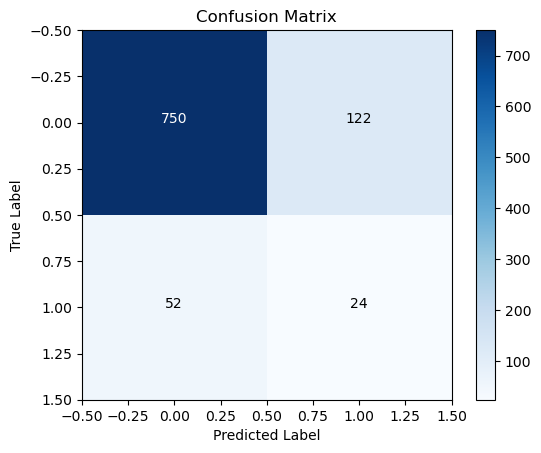

[[750 122]
 [ 52  24]]


In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ground_truth_labels, final_preds)

plt.imshow(cm, cmap='Blues')

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(cm)

#plt.savefig("val_data" + str(broj) + " " + instrument_of_interest + 'confusion_matrix.png')

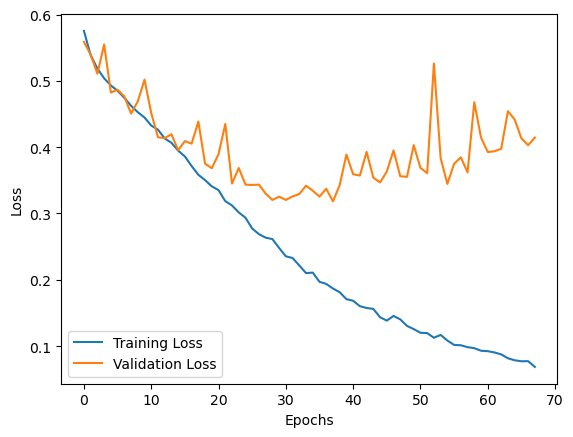

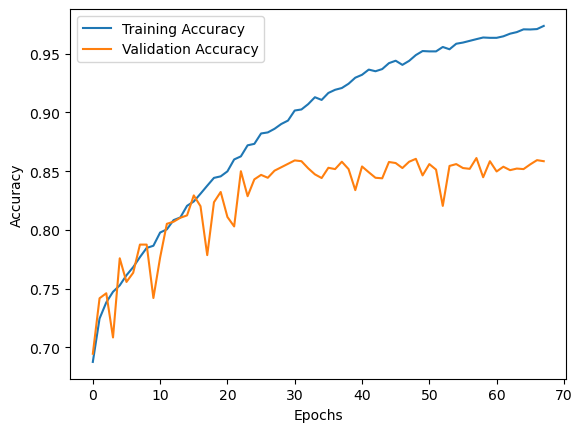

<Figure size 640x480 with 0 Axes>

In [40]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.savefig(instrument_of_interest + 'train_vall_plot.png')

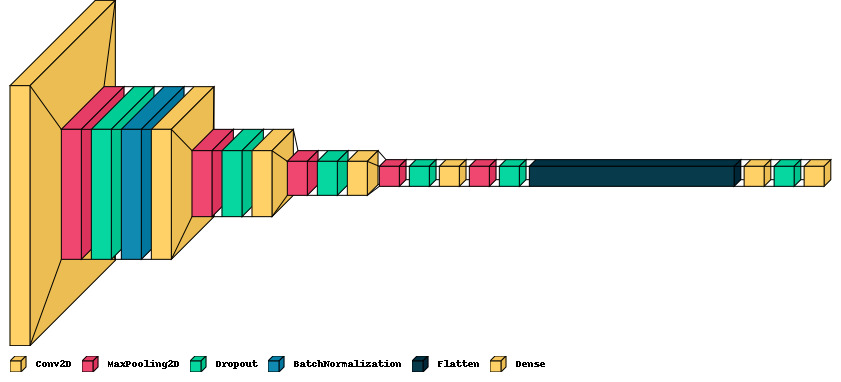

In [31]:
import visualkeras

# Generate filter visualizations for a specific layer
visualkeras.layered_view(model, to_file='model.png', legend=True, scale_xy=2, scale_z=0.02)